# Data Analysis for Sussex Budget Productions

The purpose of this study is to know about some relations between films and its profits. Also one of the aims of this analysis is solve the question of which would be the ideal film criteria to invest in if we start investing £1.5 million. An action plan will be elaborated based on the data obtained from IMDB, which is a film, video game, television series and podcast directory online database review compiler (IMDbPro, 2002), doing an exploratory data analysis,then create correlations and hypothesis and finally prove the last ones. 

I.Data Cleaning

In [90]:
#(1th step)Import Libraries

import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import random
import seaborn as sns
datamovies= "movie_metadata.csv"
datamovies=pd.read_csv(datamovies)
datamovies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [91]:
#(3rd step) we will overview the information obtained by the dataset summarizing it.
datamovies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [92]:
#(4th step)Clean the data, make it spark! knowing how many NaN values among rows and columns could be useful to replace them with the mean of each variable and drop those rows to calculate it, also the heading that we think that do not have any significant information for our correlation.
#seing how  many NaN are to have an approach.
datamovies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [93]:
datamovies=datamovies.drop([  'color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes', 
                      'duration', 
                      'facenumber_in_poster', 
                      'content_rating',  
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      'actor_2_name',
                      'actor_3_name'], 
                       axis = 1)
datamovies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6.0,English,Canada,NaN,2013.0,7.7,84
5039,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359.0,English,USA,NaN,NaN,7.5,32000
5040,Benjamin Roberds,13.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3.0,English,USA,1400.0,2013.0,6.3,16
5041,Daniel Hsia,14.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9.0,English,USA,NaN,2012.0,6.3,660


In [94]:
#(Step 5th) We will say that if the rows has =<6% of NaN values, then it will be droped due to the lack of information.
round(100*(datamovies.isnull().sum()/len(datamovies.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
country                    0.10
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [95]:
#It is possible to observe that gross and budget have huge % of Nan, because of that we will display a negation function with "isnan" boolean to deleted from the data instead of show the NaN values.
datamovies = datamovies[~np.isnan(datamovies['gross'])]
datamovies= datamovies[~np.isnan(datamovies['budget'])]
datamovies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,9000.0,2011.0,6.4,413


In [96]:
round(100*(datamovies.isnull().sum()/len(datamovies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
country                   0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [97]:
#(first step)first of all, it is important to convert the budget and gross units because our profit will be measure by £ million. To do so, divide budget and gross columns by 1000000. 
#Then create a profit column which will has the difference of 'gross' and budget and then, take the top ten profiting movies from the best one and save it in a new dataset.

datamovies['gross'] = datamovies['gross']/1000000
datamovies['budget'] = datamovies['budget']/1000000
datamovies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237.0000,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300.0000,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245.0000,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250.0000,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263.7000,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,0.0070,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.0070,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.0070,1992.0,6.9,0
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.0090,2011.0,6.4,413


In [98]:
datamovies['profit'] =datamovies['gross'] - datamovies['budget']
datamovies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.0090,2011.0,6.4,413,-0.004416


In [99]:
#set the minimum 
max_budget=1.5
datamovies_budget = datamovies[datamovies['budget'] < max_budget]
datamovies_budget = datamovies_budget.dropna()
datamovies_budget

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
1281,Martin Scorsese,112.0,0.032645,Crime|Drama|Romance|Thriller,Robert De Niro,Mean Streets,67797,223.0,English,USA,0.500000,1973.0,7.4,0,-0.467355
2242,Alfred Hitchcock,290.0,32.000000,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1040.0,English,USA,0.806947,1960.0,8.5,18000,31.193053
2420,John Carpenter,212.0,21.378000,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,1.000000,1980.0,6.8,7000,20.378000
2492,John Carpenter,318.0,47.000000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,0.300000,1978.0,7.9,12000,46.700000
2619,John Carpenter,318.0,47.000000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,0.300000,1978.0,7.9,12000,46.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,0.007000,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.007000,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.007000,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.009000,2011.0,6.4,413,-0.004416


In [100]:
datamovies_budget.shape

(250, 15)

now the data is restrictet to 1.5 million in budget, and the fourther analysis will be carry out above dataset

In [101]:
#sort in desending way the profit in the dataframe
datamovies_budget= datamovies_budget.sort_values(by = 'profit', ascending = False)
datamovies_budget

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4707,Daniel Myrick,360.0,140.530114,Horror,Heather Donahue,The Blair Witch Project,186786,3400.0,English,USA,0.060,1999.0,6.4,0,140.470114
4530,John G. Avildsen,141.0,117.235247,Drama|Sport,Sylvester Stallone,Rocky,375240,542.0,English,USA,0.960,1976.0,8.1,0,116.275247
4674,George Lucas,100.0,115.000000,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,USA,0.777,1973.0,7.5,0,114.223000
4793,Oren Peli,409.0,107.917283,Horror,Micah Sloat,Paranormal Activity,184824,1189.0,English,USA,0.015,2007.0,6.3,12000,107.902283
4485,James Wan,287.0,55.153403,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,1509.0,English,USA,1.200,2004.0,7.7,0,53.953403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,James David Pasternak,17.0,0.007826,Comedy|Documentary,Robin Williams,Certifiably Jonathan,132,2.0,English,USA,1.200,2007.0,6.2,87,-1.192174
4505,Tom Sanchez,1.0,0.003830,Comedy|Drama,Nataniel Sánchez,The Knife of Don Juan,27,1.0,Spanish,USA,1.200,2013.0,7.2,75,-1.196170
4488,Claudia Sainte-Luce,50.0,0.011278,Comedy|Drama,Ximena Ayala,The Amazing Catfish,1229,2.0,Spanish,Mexico,1.300,2013.0,7.0,407,-1.288722
4452,Zak Penn,60.0,0.036830,Adventure|Comedy|Horror,Zak Penn,Incident at Loch Ness,3291,63.0,English,UK,1.400,2004.0,6.6,400,-1.363170


In [102]:
datamovies_budget.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,96.368000,6.583216,36040.132000,177.380000,0.591340,1999.144000,6.74640,2849.728000,5.991876
std,94.367396,17.588697,81000.451575,323.325683,0.402169,14.470967,0.89636,7570.824468,17.594227
min,1.000000,0.000721,27.000000,1.000000,0.000218,1929.000000,3.60000,0.000000,-1.381565
25%,26.500000,0.105692,1730.750000,29.500000,0.225000,1997.000000,6.22500,0.000000,-0.406017
50%,64.000000,0.746785,6165.000000,74.000000,0.500000,2003.000000,6.80000,131.000000,0.288458
75%,136.750000,3.792970,30458.250000,192.250000,1.000000,2008.000000,7.30000,665.500000,3.212867
max,481.000000,140.530114,664719.000000,3400.000000,1.400000,2015.000000,8.90000,51000.000000,140.470114


# Explanatory Data Analysis (EDA)

Analysis we are concentrating on the mainly 'country','language', 'directors' and 'genres'. These variables will be compaired with the variables such as 'gross' and 'profit' restricting the budget in £1.5 million.

In [103]:
#draing the correlation matrix for detecting related and irrelevant columns
corr_matrix = datamovies_budget.corr()
corr_matrix

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.426511,0.469449,0.596287,0.065092,-0.001021,0.236947,0.585181,0.424889
gross,0.426511,1.000000,0.398597,0.711099,-0.002321,-0.218233,0.084183,0.083957,0.999739
num_voted_users,0.469449,0.398597,1.000000,0.637877,0.100407,-0.256649,0.412375,0.450862,0.396177
num_user_for_reviews,0.596287,0.711099,0.637877,1.000000,-0.048744,-0.190745,0.226242,0.249228,0.711990
budget,0.065092,-0.002321,0.100407,-0.048744,1.000000,0.051839,0.016419,0.074532,-0.025178
title_year,-0.001021,-0.218233,-0.256649,-0.190745,0.051839,1.000000,-0.272358,0.074769,-0.219349
imdb_score,0.236947,0.084183,0.412375,0.226242,0.016419,-0.272358,1.000000,0.208000,0.083782
movie_facebook_likes,0.585181,0.083957,0.450862,0.249228,0.074532,0.074769,0.208000,1.000000,0.082226
profit,0.424889,0.999739,0.396177,0.711990,-0.025178,-0.219349,0.083782,0.082226,1.000000


the inferation that we can get in the correlation matrix is 'num_critic_for_reviews','num_voted_users', 'num_user_for_reviews' have a significant impact on the variable 'gross'. 

C:\Users\Sharath Devraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


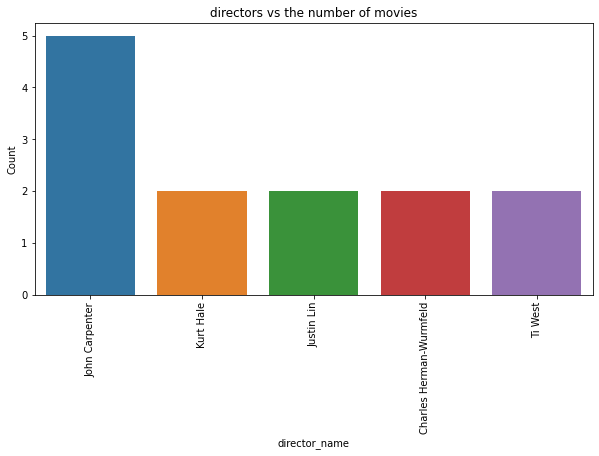

In [104]:
#Bar chart of directors vs the amount of movies
plt.figure(figsize = (10,5))
sns.barplot(datamovies_budget['director_name'].value_counts()[:5].index,datamovies_budget['director_name'].value_counts()[:5].values)
plt.title('directors vs the number of movies')
plt.xlabel('director_name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [105]:
#sort the director_name according to profit made by there movies
director = datamovies_budget.pivot_table(values = 'profit', index = 'director_name', aggfunc = 'mean')
director = director.sort_values(by = 'profit', ascending = False)
director = director.iloc[:10, ]
director

,profit
director_name,
Daniel Myrick,140.470114
John G. Avildsen,116.275247
George Lucas,114.223000
Oren Peli,107.902283
James Wan,53.953403
William Brent Bell,52.245055
Jared Hess,44.140956
Joe Camp,39.052600
John Carpenter,36.171200


we are concidering here top ten directors corresponding their profits, becausein the bar chart we obtain 'John Carpenter' as the highest number movies but it could not appear in the top 5 profit maker directors.

In [106]:
datamovies_budget[datamovies_budget['director_name']=='John Carpenter']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
2492,John Carpenter,318.0,47.000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,0.3,1978.0,7.9,12000,46.700
2619,John Carpenter,318.0,47.000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,0.3,1978.0,7.9,12000,46.700
4821,John Carpenter,318.0,47.000,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,1191.0,English,USA,0.3,1978.0,7.9,12000,46.700
4532,John Carpenter,212.0,21.378,Fantasy|Horror,Jamie Lee Curtis,The Fog,46493,335.0,English,USA,1.0,1980.0,6.8,7000,20.378
2420,John Carpenter,212.0,21.378,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,1.0,1980.0,6.8,7000,20.378


C:\Users\Sharath Devraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


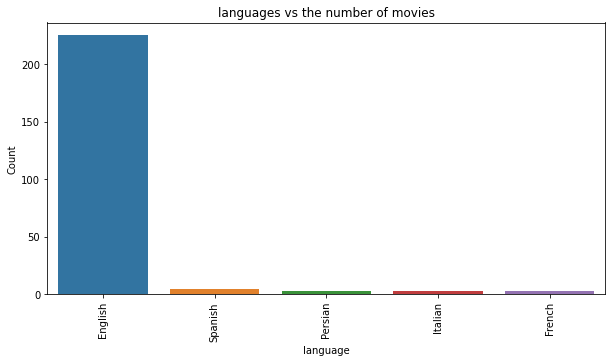

In [107]:
#Bar chart of languages vs the amount of movies
plt.figure(figsize = (10,5))
sns.barplot(datamovies_budget['language'].value_counts()[:5].index,datamovies_budget['language'].value_counts()[:5].values)
plt.title('languages vs the number of movies')
plt.xlabel('language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Inference: from the bar chart we can conclude that 'English' movies are the vast majority in the industry bewteen our budget.

In [108]:
datamovies_budget[datamovies_budget['language']=='Italian']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,Italy,1.2,1966.0,8.9,20000,4.900000
4897,Sergio Leone,122.0,3.500000,Action|Drama|Western,Clint Eastwood,A Fistful of Dollars,147566,235.0,Italian,Italy,0.2,1964.0,8.0,0,3.300000
4802,Lucio Fulci,203.0,0.126387,Horror,Catriona MacColl,The Beyond,14985,253.0,Italian,Italy,0.4,1981.0,6.9,2000,-0.273613


In [109]:
datamovies_budget[datamovies_budget['language']=='English']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4707,Daniel Myrick,360.0,140.530114,Horror,Heather Donahue,The Blair Witch Project,186786,3400.0,English,USA,0.060,1999.0,6.4,0,140.470114
4530,John G. Avildsen,141.0,117.235247,Drama|Sport,Sylvester Stallone,Rocky,375240,542.0,English,USA,0.960,1976.0,8.1,0,116.275247
4674,George Lucas,100.0,115.000000,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,USA,0.777,1973.0,7.5,0,114.223000
4793,Oren Peli,409.0,107.917283,Horror,Micah Sloat,Paranormal Activity,184824,1189.0,English,USA,0.015,2007.0,6.3,12000,107.902283
4485,James Wan,287.0,55.153403,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,1509.0,English,USA,1.200,2004.0,7.7,0,53.953403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,Panos Cosmatos,97.0,0.056129,Sci-Fi|Thriller,Chris Gauthier,Beyond the Black Rainbow,6555,82.0,English,Canada,1.100,2010.0,6.1,0,-1.043871
4932,Robinson Devor,18.0,0.110720,Comedy,Marilyn Rising,The Woman Chaser,524,22.0,English,USA,1.200,1999.0,7.3,73,-1.089280
4501,Kurt Voss,12.0,0.058936,Comedy|Music,Lemmy,Down and Out with the Dolls,91,4.0,English,USA,1.200,2001.0,6.1,27,-1.141064
4503,James David Pasternak,17.0,0.007826,Comedy|Documentary,Robin Williams,Certifiably Jonathan,132,2.0,English,USA,1.200,2007.0,6.2,87,-1.192174


C:\Users\Sharath Devraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


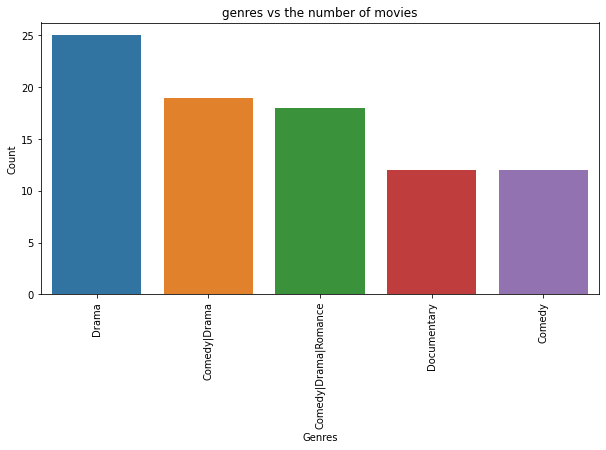

In [110]:
#Bar chart of genres vs the amount of movies
plt.figure(figsize = (10,5))
sns.barplot(datamovies_budget['genres'].value_counts()[:5].index,datamovies_budget['genres'].value_counts()[:5].values)
plt.title('genres vs the number of movies')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [111]:
#sort the mean imdb score and profit across films by genre. Set a minimum imdb score and filter accordingly.
genreseries=datamovies_budget.groupby('genres')[['imdb_score','profit',]].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('profit', ascending=False)
#print the genres for inspection
top_rated_genre.head()

,imdb_score,profit
genres,,
Documentary|Drama|Sport,8.3,7.130611
Drama|Mystery,8.4,6.598492
Adventure|Comedy|Fantasy,8.3,0.999622
Drama|Family,8.5,0.745402
Biography|Crime|Documentary|History,8.2,-0.515779


In [112]:
datamovies_budget[datamovies_budget['genres']=='Drama']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
3821,Billy Bob Thornton,104.0,24.475416,Drama,Robert Duvall,Sling Blade,72443,309.0,English,USA,0.890,1996.0,8.0,0,23.585416
4484,Steven Soderbergh,58.0,24.741700,Drama,Peter Gallagher,"Sex, Lies, and Videotape",37785,95.0,English,USA,1.200,1989.0,7.2,2000,23.541700
4491,Kenneth Lonergan,122.0,9.180275,Drama,Matthew Broderick,You Can Count on Me,22145,231.0,English,USA,1.200,2000.0,7.7,756,7.980275
4731,Brian Baugh,20.0,3.773863,Drama,Randy Wayne,To Save a Life,4583,55.0,English,USA,1.000,2009.0,7.1,0,2.773863
4900,David G. Evans,25.0,2.428241,Drama,Michael Joiner,The Grace Card,2099,26.0,English,USA,0.200,2010.0,6.4,0,2.228241
4696,Ryan Fleck,208.0,2.694973,Drama,Ryan Gosling,Half Nelson,70885,189.0,English,USA,0.700,2006.0,7.2,0,1.994973
4796,Richard Glatzer,69.0,1.689999,Drama,Emily Rios,Quinceañera,3675,48.0,Spanish,USA,0.400,2006.0,7.1,426,1.289999
4735,Siddiq Barmak,105.0,1.127331,Drama,Marina Golbahari,Osama,7559,77.0,Dari,Afghanistan,0.046,2003.0,7.4,0,1.081331
4891,Jon Shear,38.0,1.027119,Drama,Dan Futterman,Urbania,2742,73.0,English,USA,0.225,2000.0,7.0,72,0.802119
5027,Jafar Panahi,64.0,0.673780,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,26.0,Persian,Iran,0.010,2000.0,7.5,697,0.663780


In [113]:
datamovies_budget[datamovies_budget['genres']=='Drama|Family']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,Iran,0.18,1997.0,8.5,0,0.745402


<AxesSubplot:title={'center':'gross'}, xlabel='[genres]'>

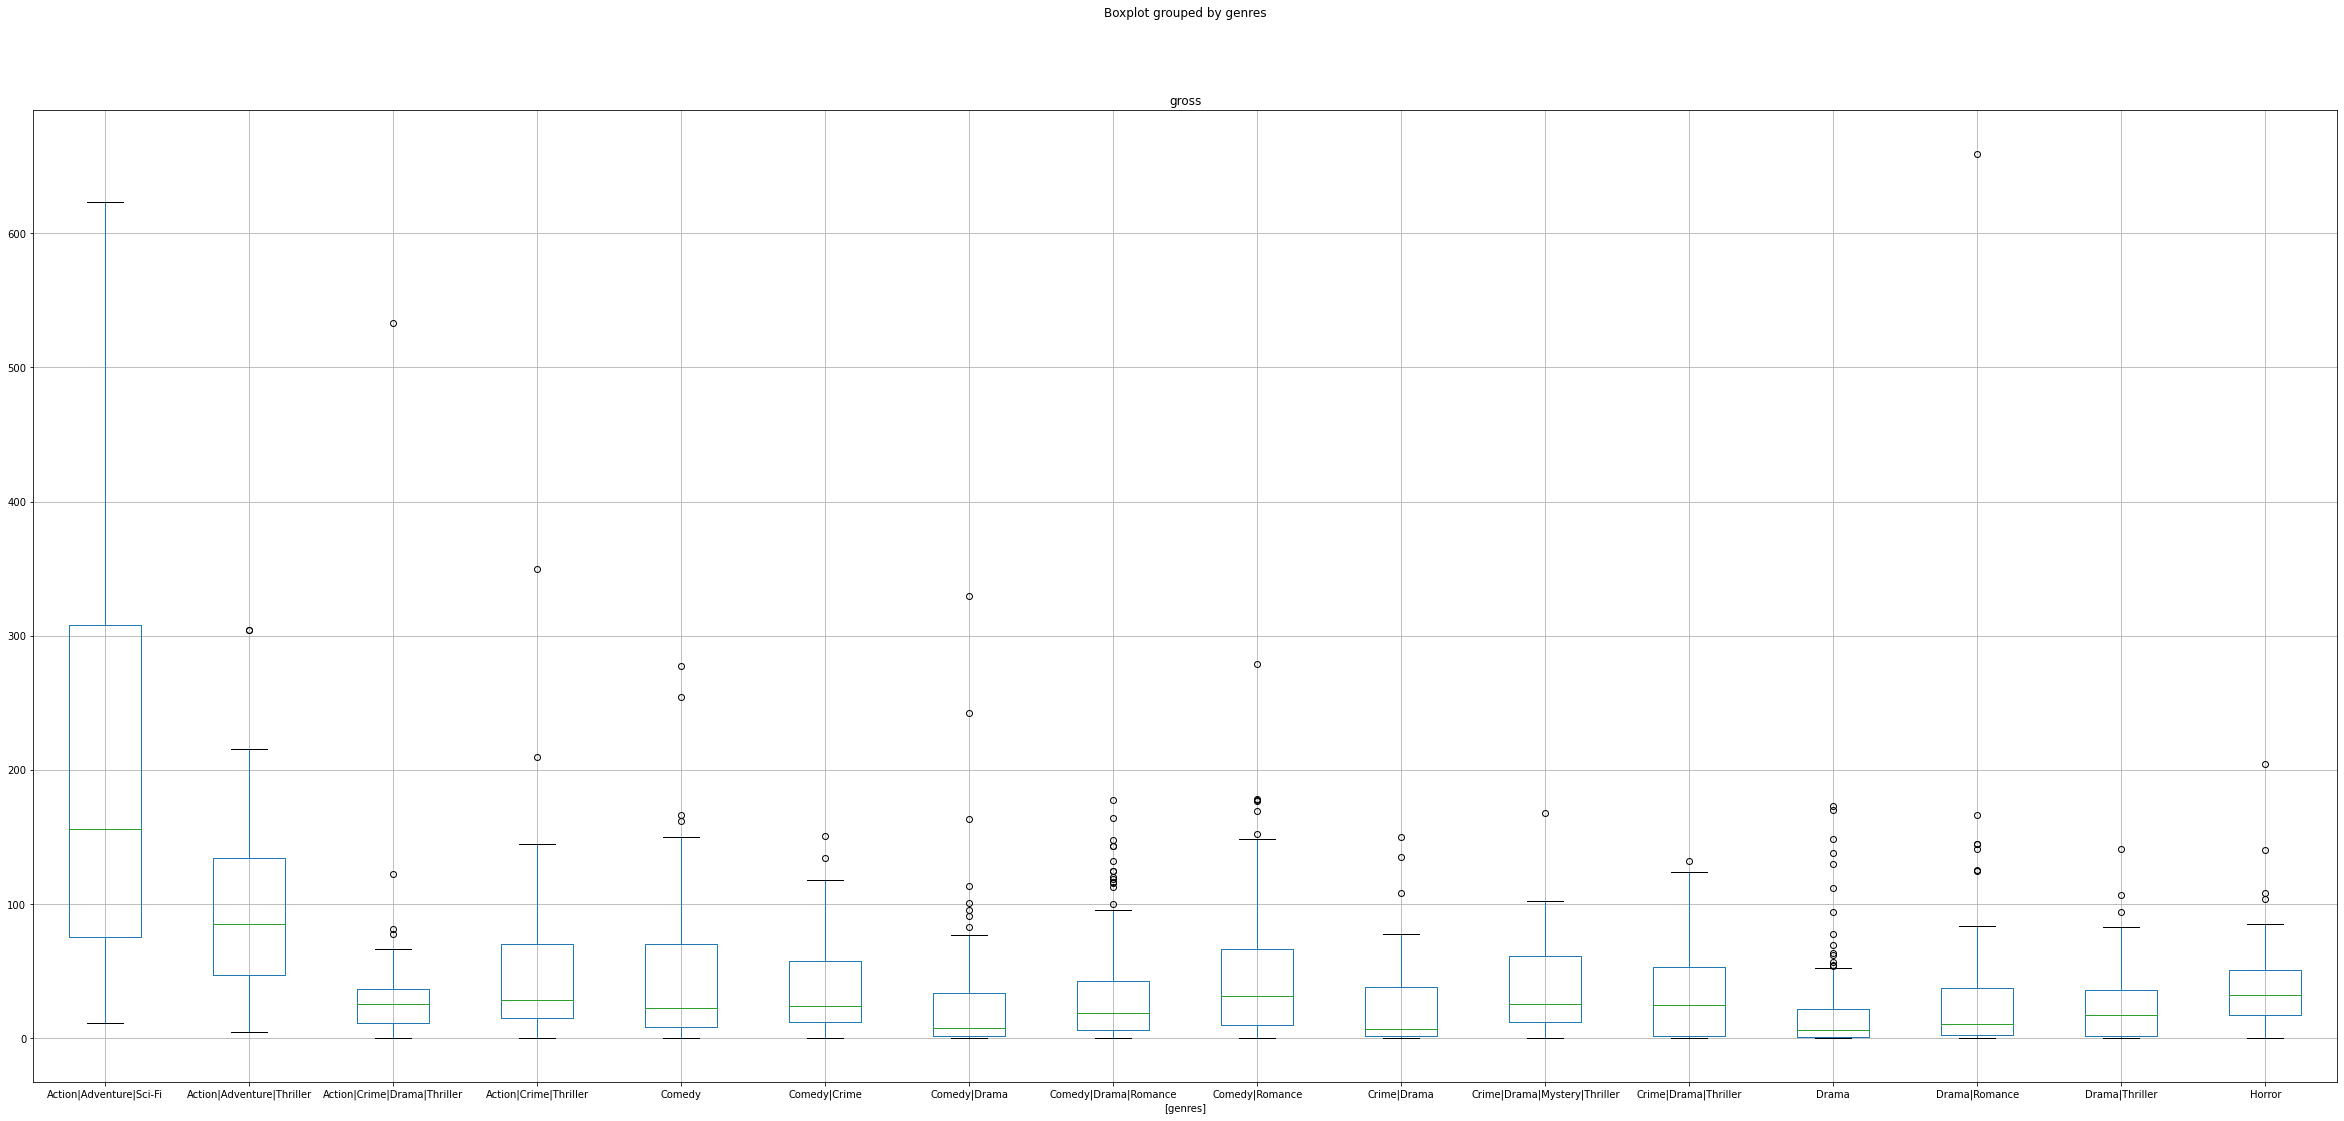

In [114]:
#Boxplot for the genres which have more than 40 samples in the dataset
n=40
genre_budgets=datamovies.loc[:,['genres','budget','gross']].groupby('genres')

#make a new dataframe indexed by genres which stores country and counts of budgets (i.e., number of films)
counts_gen=genre_budgets.count().reset_index('genres')
#print counts

#restrict this to ones which have the number of counts > n
biggenres=counts_gen[counts_gen.budget>n]['genres']

biggenres_df = datamovies[datamovies.genres.isin(biggenres)].loc[:,['genres','gross']]

biggenres_df.boxplot(by='genres',figsize=(40,18))

we have a 'Drama' as a common factor that is in bewteen our profit with a significant high imdb ratings. Dramas is in the 3 top genre movies when it is compaired with number of movies.

In [118]:
#sort the mean imdb score and profit across films by genre. Set a minimum imdb score and filter accordingly.
genreseries=datamovies_budget.groupby('country')[['imdb_score','profit',]].mean()
#set the minimum imdb score that I care about to 6.7
min_imdb_score=6.7
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('profit', ascending=False)
#print the genres for inspection
top_rated_genre.head()

,imdb_score,profit
country,,
Ireland,7.900000,9.257933
Indonesia,7.600000,3.005123
Iran,8.133333,2.669225
Italy,7.933333,2.642129
UK,7.115789,1.524805


In [125]:
datamovies_budget[datamovies_budget['country']=='Ireland']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4931,John Carney,232.0,9.437933,Drama|Music|Romance,Glen Hansard,Once,90827,329.0,English,Ireland,0.18,2007.0,7.9,26000,9.257933


In [123]:
datamovies_budget[datamovies_budget['country']=='UK']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
4537,Terence Young,184.0,16.067035,Action|Adventure|Thriller,Ursula Andress,Dr. No,116642,389.0,English,UK,1.100000,1962.0,7.3,5000,14.967035
4539,Clive Barker,203.0,14.564027,Fantasy|Horror,Andrew Robinson,Hellraiser,76407,335.0,English,UK,1.000000,1987.0,7.0,0,13.564027
4458,Guy Ritchie,116.0,3.650677,Comedy|Crime,Jason Statham,"Lock, Stock and Two Smoking Barrels",414976,523.0,English,UK,0.960000,1998.0,8.2,21000,2.690677
4353,James Marsh,194.0,2.957978,Biography|Crime|Documentary|History|Thriller,Paul McGill,Man on Wire,40481,134.0,English,UK,1.000000,2008.0,7.8,0,1.957978
4795,Terry Gilliam,131.0,1.229197,Adventure|Comedy|Fantasy,Eric Idle,Monty Python and the Holy Grail,382240,660.0,English,UK,0.229575,1975.0,8.3,14000,0.999622
4922,Andrew Haigh,143.0,0.469947,Drama|Romance,Tom Cullen,Weekend,19846,68.0,English,UK,0.120000,2011.0,7.7,0,0.349947
4564,Nicole Holofcener,18.0,1.277257,Comedy|Drama|Romance,Kevin Corrigan,Walking and Talking,2629,32.0,English,UK,1.000000,1996.0,6.8,227,0.277257
4311,Hunter Richards,34.0,0.012667,Drama|Romance,Jason Statham,London,19336,90.0,English,UK,0.014000,2005.0,6.6,0,-0.001333
4719,Richard Lester,105.0,0.515005,Comedy|Musical,Paul McCartney,A Hard Day's Night,31429,219.0,English,UK,0.560000,1964.0,7.7,0,-0.044995
4783,Hans Canosa,365.0,0.379122,Comedy|Drama|Romance,Olivia Wilde,Conversations with Other Women,10143,54.0,English,UK,0.450000,2005.0,7.1,0,-0.070878


by restricting my imdb to higher value i.e 8 and more i will be getting only one country as a top profit maker which is Iran.so in order to have greater choise I will be considering the mean imdb scoring from my correlation matrix table which is 6.7.

# Hypothesis Testing

In [64]:
from scipy import stats

#T-test on directors for those observations are less than 30

topdirector_data = datamovies_budget[datamovies_budget['director_name'] == 'John Carpenter']
topdirector_gross = topdirector_data['profit']
topdirector_budget_ttest=stats.ttest_1samp(topdirector_gross,0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = topdirector_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

#T-test on directors for those observations are less than 30

topdirector_data = datamovies_budget[datamovies_budget['director_name'] == 'Daniel Myrick']
topdirector_gross = topdirector_data['gross']
topdirector_budget_ttest=stats.ttest_1samp(topdirector_gross,1.5,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = topdirector_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

topdirector_data = datamovies_budget[datamovies_budget['director_name'] == 'Oren Peli']
topdirector_gross = topdirector_data['gross']
topdirector_budget_ttest=stats.ttest_1samp(topdirector_gross,1.5,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = topdirector_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

topdirector_data = datamovies_budget[datamovies_budget['director_name'] == 'Alfred Hitchcock']
topdirector_profit = topdirector_data['gross']
topdirector_budget_ttest=stats.ttest_1samp(topdirector_profit,1.5,alternative='greater') # or rely on function behaviour "omit"
topdirector_tail_p = topdirector_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

one_tail p from scipy:  0.0012399403477820925
one_tail p from scipy:  nan
one_tail p from scipy:  nan
one_tail p from scipy:  nan


We are getting an error for the last 3 directos due to their have produced just one movie withing the budget, even thought they were produced the profit.
as we have low p-value for the director 'John Carpenter',that indecate strong evidence against the null hypothesis(there is no relation between director and profit made by the movie) and go for the alternative hypothesis(there is strong relation between the selection of director and profit).

In [67]:
#T-test on language for those observations are less than 30

language_data = datamovies_budget[datamovies_budget['language'] == 'English']
language_budget = language_data['profit']
language_budget_ttest=stats.ttest_1samp(language_budget,popmean=0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = language_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for English: ', one_tail_p)


#T-test on language for those observations are less than 30

language_data = datamovies_budget[datamovies_budget['language'] == 'Spanish']
language_budget = language_data['profit']
language_budget_ttest=stats.ttest_1samp(language_budget,popmean=0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = language_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for Spanish: ', one_tail_p)

#T-test on language for those observations are less than 30

language_data = datamovies_budget[datamovies_budget['language'] == 'Italian']
language_budget = language_data['profit']
language_budget_ttest=stats.ttest_1samp(language_budget,popmean=0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = language_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for Italian: ', one_tail_p)

one_tail p from scipy for English:  5.7549984931118594e-08
one_tail p from scipy for Spanish:  0.2635523306306166
one_tail p from scipy for Italian:  0.056546480043914986


the inference from the t test is that we can go ofr english movies due to the quantity of them, Italian language is just in 3 movies an there is just one movie that is in spanish. 

In [71]:
# T-test on genres for those observations are less than 30

genres_data = datamovies_budget[datamovies_budget['genres'] == 'Drama']
genres_budget = genres_data['profit']
genres_budget_ttest=stats.ttest_1samp(genres_budget,0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = genres_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for Drama: ', one_tail_p)

genres_data = datamovies_budget[datamovies_budget['genres'] == 'Drama|Family']
genres_budget = genres_data['profit']
genres_budget_ttest=stats.ttest_1samp(genres_budget,0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = genres_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for Drama|Family: ', one_tail_p)

genres_data = datamovies_budget[datamovies_budget['genres'] == 'Comedy|Drama']
genres_budget = genres_data['profit']
genres_budget_ttest=stats.ttest_1samp(genres_budget,0,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = genres_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy for Comedy|Drama: ', one_tail_p)

one_tail p from scipy for Drama:  0.01773812245415343
one_tail p from scipy for Drama|Family:  nan
one_tail p from scipy for Comedy|Drama:  0.006123439991619933


C:\Users\Sharath Devraj\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sharath Devraj\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


It is recommended to go for Drama first and then comedy Drama movie. error for 'Drama|Family' because it has just one movie made with the same profit than the others.

In [122]:
#T-test on countries for those observations are less than 30

country_data = datamovies_budget[datamovies_budget['country'] == 'UK']
country_budget = country_data['gross']
country_budget_ttest=stats.ttest_1samp(country_budget,1.5,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = country_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

country_data = datamovies_budget[datamovies_budget['country'] == 'Ireland']
country_budget = country_data['gross']
country_budget_ttest=stats.ttest_1samp(country_budget,1.5,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = country_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

country_data = datamovies_budget[datamovies_budget['country'] == 'Iran']
country_budget = country_data['gross']
country_budget_ttest=stats.ttest_1samp(country_budget,1.5,alternative='greater') # or rely on function behaviour "omit"
one_tail_p = country_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print ('one_tail p from scipy: ', one_tail_p)

one_tail p from scipy:  0.1250725152911402
one_tail p from scipy:  nan
one_tail p from scipy:  0.14348488377646448


C:\Users\Sharath Devraj\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sharath Devraj\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


based on the p-value the order of selecting the country could be 'Uk','Iran' and error for the 'Ireland' because has only one movie 

# Conclusion

To conclution we can advise that if the company want to be supported by the investors, it should show this that which describes Drama is the correct genre to base the next movie (based with the budget that we have), made it in english with John Carpenter as a director and launched in UK.